<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.sample(2))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-El df de tarifas es pequeño ya que contiene la información sobre las 2 paquetes que maneja la empresa.
-La información concuerda con el tipo de dato con el que estan registrados.
-No tiene datos ausentes .
-No tiene datos inadecuados.
Realizaré 2 cambios:
-Acomodaré las columnas en el orden como estan en el diccionario de datos para que sea más sencillo el manejo de la información más adelante. 
-Renombraré la columna usd_monthly_pay con el nombre que tiene en el diccionario de datos usd_monthly_fee.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No hay correcciones por hacer.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
#Reacomodar las columnas en el orden como estan en el diccionario de datos:
reorganized_columns = ['plan_name', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
df_plans_reorganized = df_plans[reorganized_columns]
#print(df_plans_reorganized)

#Renombrar la columna usd_monthly_pay con el nombre que tiene en el diccionario de datos usd_monthly_fee
df_plans_reorganized.columns = ['plan_name', 'usd_monthly_fee', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
print(df_plans_reorganized)

  plan_name  usd_monthly_fee  minutes_included  messages_included  \
0      surf               20               500                 50   
1  ultimate               70              3000               1000   

   mb_per_month_included  usd_per_minute  usd_per_message  usd_per_gb  
0                  15360            0.03             0.03          10  
1                  30720            0.01             0.01           7  


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(10))
print(df_users.duplicated().sum())

     user_id first_name  last_name  age  \
454     1454   Kymberly      Cohen   56   
154     1154   Humberto     Pruitt   53   
260     1260       Alia    Aguilar   36   
254     1254      Billy       Webb   49   
382     1382       Luci       Kidd   49   
337     1337     Lucius     Arnold   31   
128     1128     Lucius  Fernandez   41   
336     1336      Vance   Bradshaw   34   
413     1413      Andre    Hensley   38   
418     1418        Hal     Barnes   40   

                                                 city    reg_date      plan  \
454                 San Antonio-New Braunfels, TX MSA  2018-05-30  ultimate   
154  Nashville-Davidson–Murfreesboro–Franklin, TN MSA  2018-07-18  ultimate   
260            Los Angeles-Long Beach-Anaheim, CA MSA  2018-12-02      surf   
254                   Detroit-Warren-Dearborn, MI MSA  2018-08-03      surf   
382            San Diego-Chula Vista-Carlsbad, CA MSA  2018-06-22  ultimate   
337          Riverside-San Bernardino-Ontario, CA MS

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


Tipo de datos no adecuados: 
-La columna reg_date esta como tipo object cuando idealmente debería ser tipo datetime64[ns] ya que contiene la fecha de suscripción, de esa manera podré darle el formato (dd, mm, aa) como indica el diccionario de datos.
-La columna churn_date esta como tipo object cuando idealmente debería ser tipo datetime64[ns] ya que contiene la fecha en la que el usuario dejó de usar el servicio, tmabien le daré el formato (dd, mm, aa) para que todo el DF quede estandarizado.
-Ambas columnas tienen el formato de fecha Y/m/d, el cual cambiaré a (dd, mm, aa) como lo indica el diccionario de datos.

Datos ausentes:
-No tiene datos ausentes a excepción de la columna 'churn_date' pero esta argumentado 'si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos', por lo que no es necesario eliminarlos o reemplazarlos.

Datos duplicados:
-No tiene datos duplicados.

Cambios adicionales:
-Acomodaré las columnas en el orden como estan en el diccionario de datos para que sea más sencillo el manejo de la información más adelante.
-No hay necesidad de cambiar a minusculas o mayusculas los nombres, apellidos y ciudades ya que despues de revisarlos con .unique() veo que las 3 columnas tienen estandarizada la primer letra mayúscula.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
#Cambiar columnas 'reg_date' y 'churn_date' a tipo datetime.
df_users[['reg_date', 'churn_date']] = df_users[['reg_date', 'churn_date']].apply(pd.to_datetime)
#Cambiar formato de fecha a (dd, mm, aa) en ambas columnas.
df_users['reg_date'] = df_users['reg_date'].apply(pd.to_datetime).dt.strftime('%d/%m/%Y')
df_users['churn_date'] = df_users['churn_date'].apply(pd.to_datetime).dt.strftime('%d/%m/%Y')
df_users.info()
print(df_users.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40   

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
#Acomodar las columnas en el orden como estan en el diccionario de datos.
reorganized_columns = ['user_id', 'first_name', 'last_name', 'age', 'reg_date', 'churn_date','city', 'plan']
df_users_reorganized = df_users[reorganized_columns]
df_users_reorganized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   reg_date    500 non-null    object
 5   churn_date  34 non-null     object
 6   city        500 non-null    object
 7   plan        500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sample(10))
print(df_calls.duplicated().sum())

              id  user_id   call_date  duration
72475   1257_215     1257  2018-08-16      0.00
32894   1123_252     1123  2018-10-23      0.00
575      1004_40     1004  2018-07-22     11.08
35380   1132_850     1132  2018-04-21      0.00
5640    1027_183     1027  2018-10-07      9.85
58857    1213_26     1213  2018-12-15      4.39
83675    1305_95     1305  2018-06-22      6.84
125195   1441_79     1441  2018-11-21      7.24
44093   1160_109     1160  2018-10-08      0.00
127259    1456_4     1456  2018-11-29      6.82
0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


Tipo de datos no adecuados: 
-La columna call_date esta como tipo object cuando idealmente debería ser tipo datetime64[ns] ya que contiene la fecha de la llamada.

Datos ausentes:
-No tiene datos ausentes.

Datos duplicados:
-No tiene datos duplicados.

Cambios adicionales:
-Acomodaré las columnas en el orden como estan en el diccionario de datos para que sea más sencillo el manejo de la información más adelante.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
#Cambiar columna 'call_date' a tipo datetime.
df_calls['call_date'] = df_calls['call_date'].apply(pd.to_datetime)
df_calls.info()
print(df_calls.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22
5  1000_388     1000 2018-12-31      2.20
6  1000_510     1000 2018-12-27      5.75
7  1000_521     1000 2018-12-28     14.18
8  1000_530     1000 2018-12-28      5.77
9  1000_544     1000 2018-12-26      4.40


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:

#Acomodar las columnas en el orden como estan en el diccionario de datos.
reorganized_columns = ['id', 'call_date', 'duration', 'user_id']
df_calls_reorganized = df_calls[reorganized_columns].copy()
df_calls_reorganized.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   call_date  137735 non-null  datetime64[ns]
 2   duration   137735 non-null  float64       
 3   user_id    137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sample(10))
print(df_messages.duplicated().sum())

             id  user_id message_date
3403   1036_238     1036   2018-10-24
43933  1293_379     1293   2018-12-10
33766  1212_270     1212   2018-11-08
62891   1398_90     1398   2018-12-23
59282  1374_456     1374   2018-12-15
10830  1077_101     1077   2018-09-24
18784   1122_13     1122   2018-10-11
62970   1399_35     1399   2018-11-13
70454  1458_143     1458   2018-12-09
41151  1264_263     1264   2018-09-24
0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Tipo de datos no adecuados: 
-La columna message_date esta como tipo object cuando idealmente debería ser tipo datetime64[ns] ya que contiene la fecha del SMS.

Datos ausentes:
-No tiene datos ausentes.

Datos duplicados:
-No tiene datos duplicados.

Cambios adicionales:
-Acomodaré las columnas en el orden como estan en el diccionario de datos para que sea más sencillo el manejo de la información más adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
#Cambiar columna 'message_date' a tipo datetime.
df_messages['message_date'] = df_messages['message_date'].apply(pd.to_datetime)
df_messages.info()
print(df_messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:

#Acomodar las columnas en el orden como estan en el diccionario de datos.
reorganized_columns = ['id', 'message_date', 'user_id']
df_messages_reorganized = df_messages[reorganized_columns].copy()
df_messages_reorganized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   message_date  76051 non-null  datetime64[ns]
 2   user_id       76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(10))
print(df_internet.duplicated().sum())

              id  user_id session_date  mb_used
47997   1214_371     1214   2018-03-21   383.37
94539   1440_177     1440   2018-09-05     0.00
78001   1363_182     1363   2018-11-03   920.11
98706   1466_187     1466   2018-10-19   119.53
2885     1016_59     1016   2018-12-13   547.94
102108  1489_120     1489   2018-09-11   476.76
25022   1115_436     1115   2018-12-08   462.02
23646   1109_224     1109   2018-09-23  1316.40
20079   1090_317     1090   2018-08-13   946.70
40722   1182_481     1182   2018-12-28   429.87
0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Tipo de datos no adecuados: 
-La columna session_date esta como tipo object cuando idealmente debería ser tipo datetime64[ns] ya que contiene la fecha de la sesión web.

Datos ausentes:
-No tiene datos ausentes.

Datos duplicados:
-No tiene datos duplicados.

Cambios adicionales:
-Acomodaré las columnas en el orden como estan en el diccionario de datos para que sea más sencillo el manejo de la información más adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
#Cambiar columna 'session_date' a tipo datetime.
df_internet['session_date'] = df_internet['session_date'].apply(pd.to_datetime)
df_internet.info()
print(df_internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
#Acomodar las columnas en el orden como estan en el diccionario de datos.
reorganized_columns = ['id', 'mb_used', 'session_date', 'user_id']
df_internet_reorganized = df_internet[reorganized_columns].copy()
df_internet_reorganized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   mb_used       104825 non-null  float64       
 2   session_date  104825 non-null  datetime64[ns]
 3   user_id       104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans_reorganized.sample(2))

  plan_name  usd_monthly_fee  minutes_included  messages_included  \
0      surf               20               500                 50   
1  ultimate               70              3000               1000   

   mb_per_month_included  usd_per_minute  usd_per_message  usd_per_gb  
0                  15360            0.03             0.03          10  
1                  30720            0.01             0.01           7  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodamente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#Extraer mes
df_calls_reorganized['month'] = df_calls_reorganized['call_date'].dt.to_period('M')
print(df_calls_reorganized['month'].sample(10))
# Contar llamadas por usuario por mes
total_monthly_calls = df_calls_reorganized.groupby(['user_id', 'month']).size().reset_index(name='total_calls')
print(total_monthly_calls.sample(10))

129854    2018-12
102073    2018-08
106318    2018-12
57092     2018-06
5261      2018-07
106717    2018-10
133197    2018-11
92090     2018-11
33932     2018-06
2116      2018-11
Name: month, dtype: period[M]
      user_id    month  total_calls
1484     1329  2018-09          168
368      1077  2018-09          119
1228     1263  2018-11           77
367      1077  2018-08          132
741      1159  2018-09          120
743      1159  2018-11          119
329      1071  2018-09           59
1544     1340  2018-09           82
1855     1404  2018-12           81
409      1086  2018-12           46


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Sumar minutos usados por usuario por mes
total_duration_per_month = df_calls_reorganized.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
print(total_duration_per_month.head(10))

   user_id    month  total_minutes
0     1000  2018-12         116.83
1     1001  2018-08         171.14
2     1001  2018-09         297.69
3     1001  2018-10         374.11
4     1001  2018-11         404.59
5     1001  2018-12         392.93
6     1002  2018-10          54.13
7     1002  2018-11         359.76
8     1002  2018-12         363.24
9     1003  2018-12        1041.00


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Extraer mes
df_messages_reorganized['month'] = df_messages_reorganized['message_date'].dt.to_period('M')
print(df_messages_reorganized['month'].sample(10))
# Contar mensajes enviados por usuario por mes
total_sms_month = df_messages_reorganized.groupby(['user_id','month']).size().reset_index(name='total_sms')
print(total_sms_month.head(10))

45625    2018-06
19419    2018-08
28667    2018-10
35099    2018-10
46155    2018-11
56044    2018-10
73709    2018-05
45590    2018-09
59629    2018-12
50796    2018-12
Name: month, dtype: period[M]
   user_id    month  total_sms
0     1000  2018-12         11
1     1001  2018-08         30
2     1001  2018-09         44
3     1001  2018-10         53
4     1001  2018-11         36
5     1001  2018-12         44
6     1002  2018-10         15
7     1002  2018-11         32
8     1002  2018-12         41
9     1003  2018-12         50


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Extraer mes
df_internet_reorganized['month'] = df_internet_reorganized['session_date'].dt.to_period('M')
print(df_internet_reorganized['month'].sample(10))
# Suma volumen del tráfico de Internet usado por usuario por mes y conviertelo a GB.
total_mb_used_month = df_internet_reorganized.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='total_mb_used')
print(total_mb_used_month.head(10))

34947    2018-12
71852    2018-11
19629    2018-06
4221     2018-10
1110     2018-11
61161    2018-06
75575    2018-10
81028    2018-12
56923    2018-08
54972    2018-05
Name: month, dtype: period[M]
   user_id    month  total_mb_used
0     1000  2018-12        1901.47
1     1001  2018-08        6919.15
2     1001  2018-09       13314.82
3     1001  2018-10       22330.49
4     1001  2018-11       18504.30
5     1001  2018-12       19369.18
6     1002  2018-10        6552.01
7     1002  2018-11       19345.08
8     1002  2018-12       14396.24
9     1003  2018-12       27044.14


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusionar llamadas y minutos
df_merged = pd.merge(total_monthly_calls, total_duration_per_month, on=['user_id', 'month'], how='inner')
# Fusionar con mensajes
df_merged = pd.merge(df_merged, total_sms_month, on=['user_id', 'month'], how='inner')
#Fusionar con uso de Internet
df_merged = pd.merge(df_merged, total_mb_used_month, on=['user_id', 'month'], how='inner')
print(df_merged.head(10))


   user_id    month  total_calls  total_minutes  total_sms  total_mb_used
0     1000  2018-12           16         116.83         11        1901.47
1     1001  2018-08           27         171.14         30        6919.15
2     1001  2018-09           49         297.69         44       13314.82
3     1001  2018-10           65         374.11         53       22330.49
4     1001  2018-11           64         404.59         36       18504.30
5     1001  2018-12           56         392.93         44       19369.18
6     1002  2018-10           11          54.13         15        6552.01
7     1002  2018-11           55         359.76         32       19345.08
8     1002  2018-12           47         363.24         41       14396.24
9     1003  2018-12          149        1041.00         50       27044.14


In [28]:
# Añade la información de la tarifa
df_merged = pd.merge(df_merged, df_users_reorganized[['user_id', 'plan']], on='user_id', how='left')
df_merged = pd.merge(df_merged, df_plans_reorganized,left_on='plan', right_on='plan_name', how='left')
print(df_merged.head(10))


   user_id    month  total_calls  total_minutes  total_sms  total_mb_used  \
0     1000  2018-12           16         116.83         11        1901.47   
1     1001  2018-08           27         171.14         30        6919.15   
2     1001  2018-09           49         297.69         44       13314.82   
3     1001  2018-10           65         374.11         53       22330.49   
4     1001  2018-11           64         404.59         36       18504.30   
5     1001  2018-12           56         392.93         44       19369.18   
6     1002  2018-10           11          54.13         15        6552.01   
7     1002  2018-11           55         359.76         32       19345.08   
8     1002  2018-12           47         363.24         41       14396.24   
9     1003  2018-12          149        1041.00         50       27044.14   

       plan plan_name  usd_monthly_fee  minutes_included  messages_included  \
0  ultimate  ultimate               70              3000               10

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario
#Calcular excedentes de total de llamadas, mensajes de texto y datos
df_merged['extra_minutes'] = np.maximum(df_merged['total_minutes'] - df_merged['minutes_included'], 0)
df_merged['extra_sms'] = np.maximum(df_merged['total_sms'] - df_merged['messages_included'], 0)
df_merged['extra_mb'] = np.maximum(df_merged['total_mb_used'] - df_merged['mb_per_month_included'], 0)
#Convertir los extra mb a extra gb por si se necesita más adelante
df_merged['extra_gb'] = df_merged['extra_mb']/1024
#print(df_merged.head())

# Calcular cargos por excedente de llamadas, mensajes de texto y datos
df_merged['charge_minutes'] = df_merged['extra_minutes'] * df_merged['usd_per_minute']
df_merged['charge_sms'] = df_merged['extra_sms'] * df_merged['usd_per_message']
df_merged['charge_gb'] = df_merged['extra_gb'] * df_merged['usd_per_gb']
#print(df_merged.head())

#Calcula los ingresos mensuales por usuario
df_merged['monthly_revenue'] = df_merged['usd_monthly_fee'] + df_merged['charge_minutes'] + df_merged['charge_sms'] + df_merged['charge_gb']
print(df_merged[['user_id', 'month', 'total_minutes', 'total_sms', 'total_mb_used', 'plan', 'monthly_revenue']].head(25))

    user_id    month  total_minutes  total_sms  total_mb_used      plan  \
0      1000  2018-12         116.83         11        1901.47  ultimate   
1      1001  2018-08         171.14         30        6919.15      surf   
2      1001  2018-09         297.69         44       13314.82      surf   
3      1001  2018-10         374.11         53       22330.49      surf   
4      1001  2018-11         404.59         36       18504.30      surf   
5      1001  2018-12         392.93         44       19369.18      surf   
6      1002  2018-10          54.13         15        6552.01      surf   
7      1002  2018-11         359.76         32       19345.08      surf   
8      1002  2018-12         363.24         41       14396.24      surf   
9      1003  2018-12        1041.00         50       27044.14      surf   
10     1004  2018-05         181.58          7        6547.21      surf   
11     1004  2018-06         261.32         18       20672.82      surf   
12     1004  2018-07     

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan           surf    ultimate
month                          
2018-01  278.850000  187.453333
2018-02  313.240000  458.316000
2018-03  324.985625  389.648571
2018-04  346.206286  303.301250
2018-05  418.675283  387.340952
2018-06  401.525429  349.536757
2018-07  426.454382  415.912979
2018-08  404.183950  411.488246
2018-09  402.010068  413.126479
2018-10  417.628785  438.700795
2018-11  418.942202  438.496569
2018-12  467.447073  436.801040


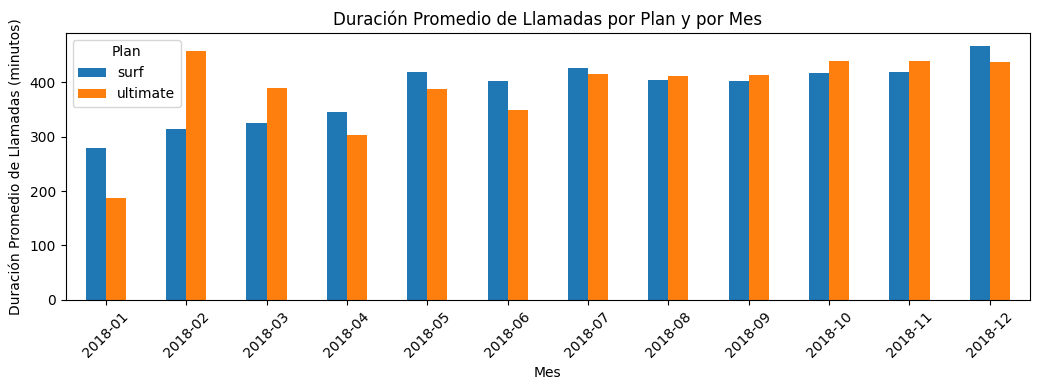

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar por plan, mes y sacar el promedio de la columna 'total_minutes'
calls_by_plan_per_month = df_merged.groupby(['plan', 'month'])['total_minutes'].mean().reset_index(name='call_duration_mean')
# Hacer tabla pivote para hacer los planes columnas
pivot_df = calls_by_plan_per_month.pivot(index='month', columns='plan', values='call_duration_mean')
print(pivot_df)
pivot_df.plot(kind='bar', figsize=(10.5, 4))

plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

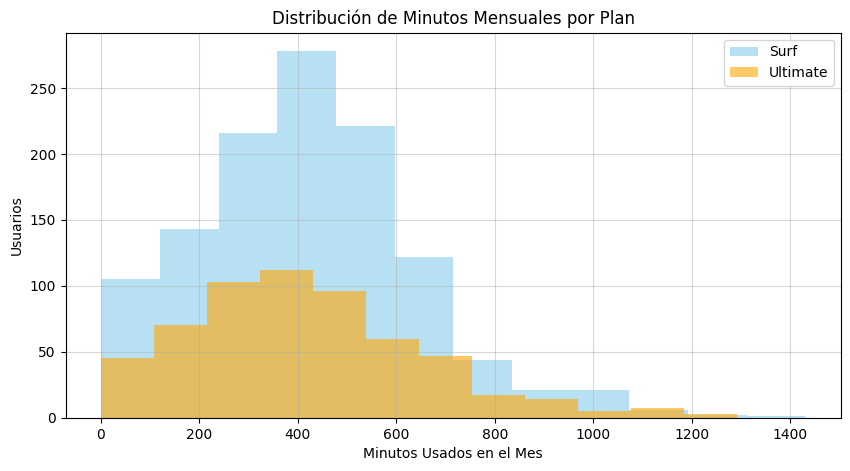

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Separar los datos por plan
surf_minutes = df_merged[df_merged['plan'] == 'surf']['total_minutes']
ultimate_minutes = df_merged[df_merged['plan'] == 'ultimate']['total_minutes']
#print(surf_minutes)
#print(ultimate_minutes)

plt.figure(figsize=(10,5))
plt.hist(surf_minutes, bins=12, alpha=0.6, label='Surf', color='skyblue')
plt.hist(ultimate_minutes, bins=12, alpha=0.6, label='Ultimate', color='orange')

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos Usados en el Mes')
plt.ylabel('Usuarios')
plt.legend()
plt.grid(alpha=0.5)
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Media de la duración mensual de llamadas
mean_total_duration_calls = df_merged['total_minutes'].mean()

# Varianza de la duración mensual de llamadas
var__total_duration_calls = df_merged['total_minutes'].var()



print(f'La media de la duración mensual de llamadas es:', mean_total_duration_calls, 'minutos.')
print(f'La varianza de la duración mensual de llamadas es:', var__total_duration_calls, 'minutos.')

La media de la duración mensual de llamadas es: 419.7197839681637 minutos.
La varianza de la duración mensual de llamadas es: 51477.09335512964 minutos.


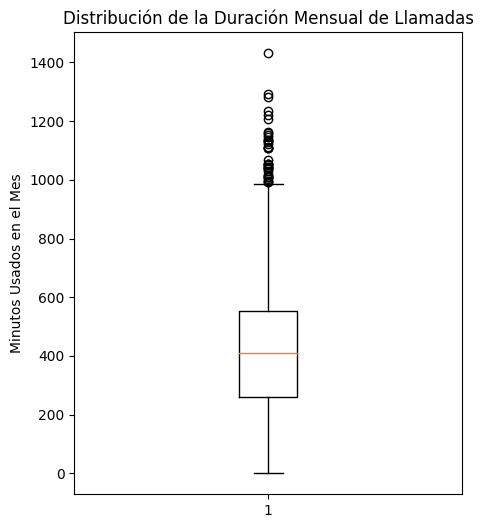

In [33]:

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(5,6))
plt.boxplot(df_merged['total_minutes'])

plt.title('Distribución de la Duración Mensual de Llamadas')
plt.ylabel('Minutos Usados en el Mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Conclusiones:

El comportamiento de los usuarios si varía en funcion al plan que eligen.
- En promedio los usuarios del plan surf no se acercan al límite de los minutos incluidos en su paquete,  a excepción del mes de diciembre, y esto puede deberse a las fiestas decembrinas, vacaciones y días familiares.
- En promedio los usuarios del plan ultimate no se acercan al límite de los minutos incluidos en su paquete en ningún mes del año.
- Los usuarios del plan surf presentan un uso moderado y más variado, por lo que los minutos que ofrece el paquete cumple con sus necesidades de comunicación mensual.
- Los usuarios del plan ultimate presentan un uso más alto y consistente en cuanto a la duración de llamadas, por eso les es conveniente pagar más para tener mayor cantidad de minutos libres en caso de que los necesiten.
-La mayoria de los usuarios (de ambos planes), usan una cantidad moderada de minutos, solamente un pequeño grupo de usuarios realiza llamadas mas prolongadas o frecuentes.
-En general son más los usuarios que usan pocos minutos a comparación de los que usan muchos minutos al mes, esto pude deberse a que cada vez las llamadas son el medio de comunicación menos utilizado, pues, por practicidad se utiliza a mensajería por internet. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


Recomiendo mostrar dos diagramas de caja, uno por cada uno de los planes, ya que nuestro objetivo principal es el de comparar los planes
</div>


### Mensajes

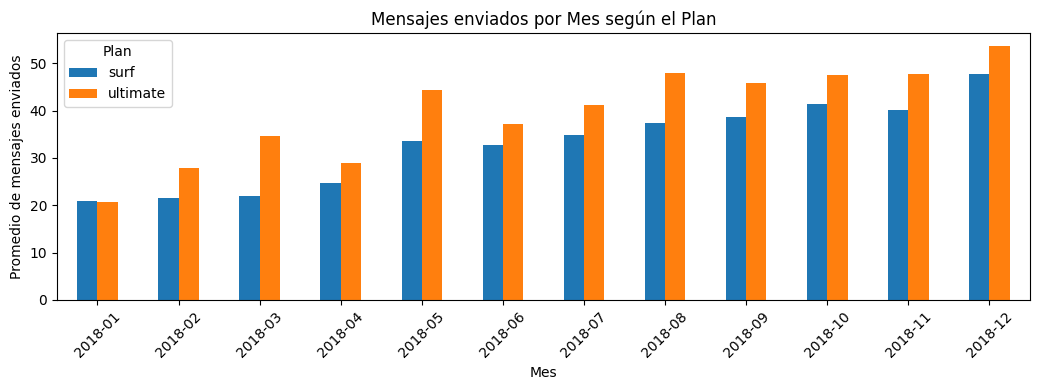

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sms_by_plan_per_month = df_merged.groupby(['plan', 'month'])['total_sms'].mean().reset_index(name='total_sms_mean')
# Hacer tabla pivote para hacer los planes columnas
pivot_df = sms_by_plan_per_month.pivot(index='month', columns='plan', values='total_sms_mean')
#print(pivot_df)
pivot_df.plot(kind='bar', figsize=(10.5, 4))

plt.title('Mensajes enviados por Mes según el Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes enviados')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

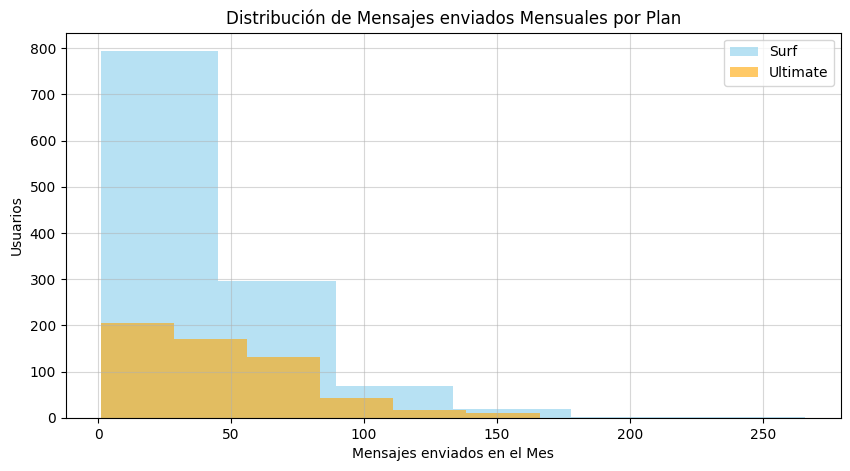

In [35]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Separar los datos por plan
surf_sms = df_merged[df_merged['plan'] == 'surf']['total_sms']
ultimate_sms = df_merged[df_merged['plan'] == 'ultimate']['total_sms']
#print(surf_minutes)
#print(ultimate_minutes)

plt.figure(figsize=(10,5))
plt.hist(surf_sms, bins=6, alpha=0.6, label='Surf', color='skyblue')
plt.hist(ultimate_sms, bins=6, alpha=0.6, label='Ultimate', color='orange')

plt.title('Distribución de Mensajes enviados Mensuales por Plan')
plt.xlabel('Mensajes enviados en el Mes')
plt.ylabel('Usuarios')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

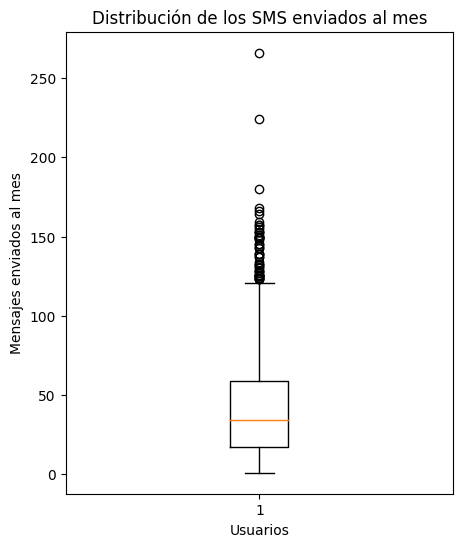

In [36]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes de texto enviados al mes.
plt.figure(figsize=(5,6))
plt.boxplot(df_merged['total_sms'])

plt.title('Distribución de los SMS enviados al mes')
plt.ylabel('Mensajes enviados al mes')
plt.xlabel('Usuarios')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

-En promedio los usuarios del plan ultimate suelen enviar más mensajes de texto al mes que los usuarios del plan surf, sin embargo no llegan al limite de mensajes que les incluye el paquete. 
-Los usuarios del plan surf se acercan más al límite de mensajes que incluyen sus paquetes, sin embargo ambos paquetes muestran una tendencia estable a lo largo del año, sin variaciones muy grandes mensuales.
-Los usuarios de ambos planes envían relativamente pocos mensajes de texto al mes, siendo solo algunos usuarios sobre todo del plan ultimate que se muestran mas activos.
-El tipo de plan influye directamente en el nivel de uso del servicio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de mostrar los datos de la misma manera que en `llamadas`, así se mantiene una constancia a lo largo del proyecto
</div>


### Internet

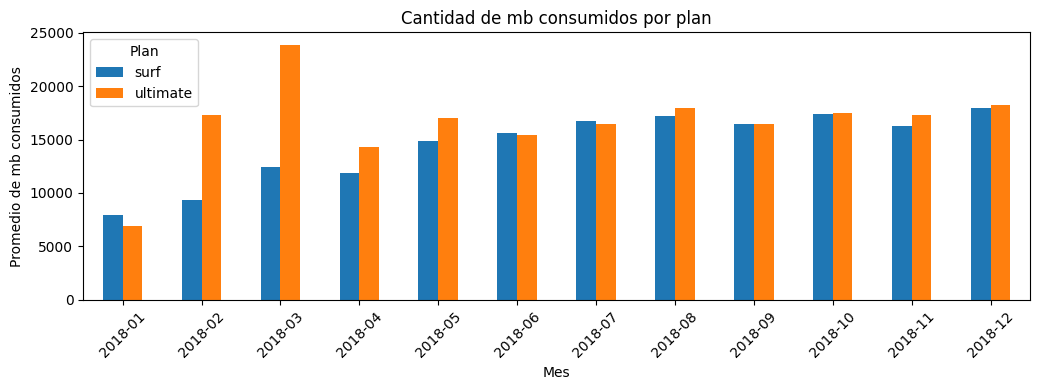

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mb_used_per_month = df_merged.groupby(['plan','month'])['total_mb_used'].mean().reset_index(name='total_mb_mean')
# Hacer tabla pivote para hacer los planes columnas
pivot_df = mb_used_per_month.pivot(index='month', columns='plan', values='total_mb_mean')
#print(pivot_df)

pivot_df.plot(kind='bar', figsize=(10.5, 4))

plt.title('Cantidad de mb consumidos por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de mb consumidos')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

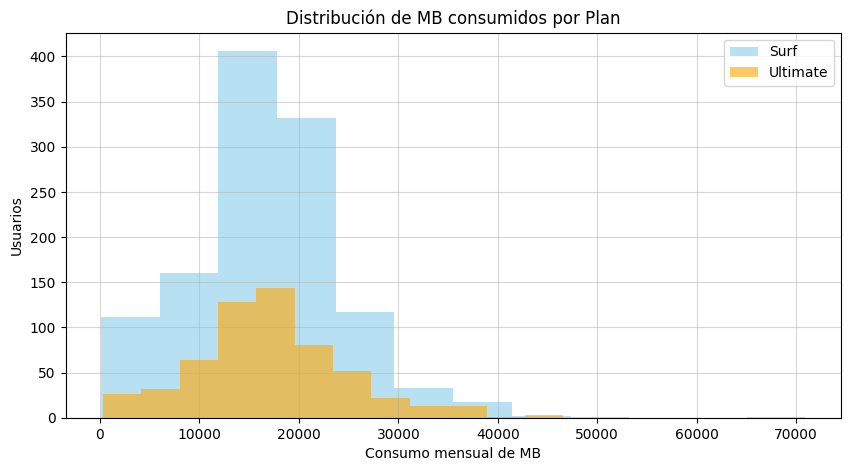

In [38]:
# Compara la cantidad de MB que los usuarios de cada plan necesitan. Traza un histograma.
# Separar los datos por plan

surf_mb = df_merged[df_merged['plan'] == 'surf']['total_mb_used']
ultimate_mb = df_merged[df_merged['plan'] == 'ultimate']['total_mb_used']
#print(surf_minutes)
#print(ultimate_minutes)

plt.figure(figsize=(10,5))
plt.hist(surf_mb, bins=12, alpha=0.6, label='Surf', color='skyblue')
plt.hist(ultimate_mb, bins=12, alpha=0.6, label='Ultimate', color='orange')

plt.title('Distribución de MB consumidos por Plan')
plt.xlabel('Consumo mensual de MB')
plt.ylabel('Usuarios')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


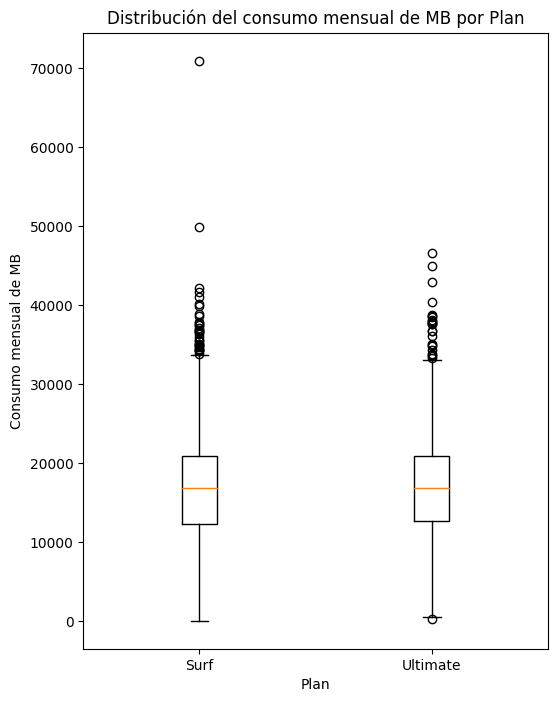

In [39]:
# Traza un diagrama de caja para visualizar la distribución de los MB que los usuarios consumen al mes.

plt.figure(figsize=(6,8))
plt.boxplot([surf_mb, ultimate_mb],
            labels=['Surf', 'Ultimate'])

plt.title('Distribución del consumo mensual de MB por Plan')
plt.xlabel('Plan')
plt.ylabel('Consumo mensual de MB')
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
-El consumo de MB en ambos planes es bastante parecido y estable a lo largo del año, a excepción de Febrero y Marzo en dónde  los usuarios del plan ultimate llegan a límite de sus MB incluidos e incluso exceden ese límite.
-En general los usuarios del plan  ultimate suelen ser más activos en el uso de internet, los usuarios consumen sus datos de manera más diversa, algunos moderadamente y hacen uso intensivo.
-Los usuarios del plan surf utilizan sus MB se manera más moderada, muestran menos variabilidad.
-Entonces el comportamiento de los usuarios esta vínculado al plan que adquieren.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [40]:
#df_merged['user_id', 'month', 'total_minutes', 'total_sms', 'total_mb_used', 'plan', 'monthly_revenue']
surf_revenue = df_merged[df_merged['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = df_merged[df_merged['plan'] == 'ultimate']['monthly_revenue']
#print(surf_revenue)
#print(ultimate_revenue)

surf_revenue.describe()

count    1180.000000
mean       56.877475
std        51.828245
min        20.000000
25%        20.000000
50%        36.841452
75%        76.309060
max       581.328509
Name: monthly_revenue, dtype: float64

In [41]:
ultimate_revenue.describe()

count    579.000000
mean      72.062930
std       10.482571
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: monthly_revenue, dtype: float64

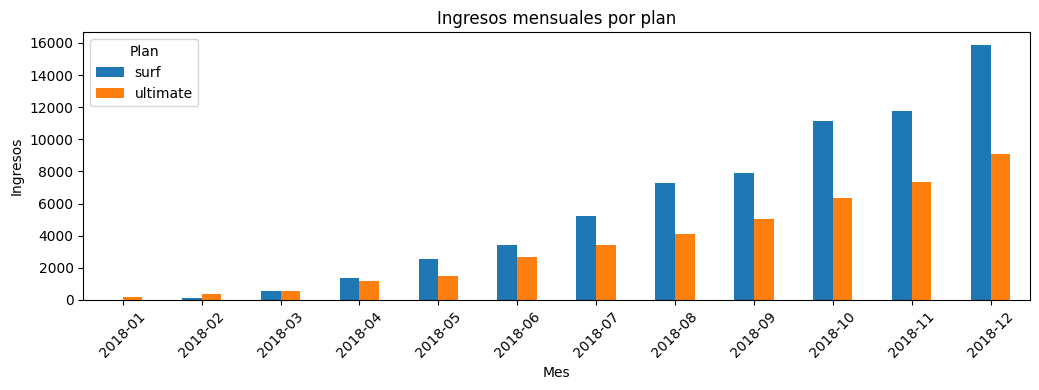

In [42]:
# Compara la cantidad de ingresos mensuales por plan
total_revenue_per_plan = df_merged.groupby(['plan','month'])['monthly_revenue'].sum().reset_index(name='total_revenue')
# Hacer tabla pivote para hacer los planes columnas
pivot_df = total_revenue_per_plan.pivot(index='month', columns='plan', values='total_revenue')
#print(pivot_df)

pivot_df.plot(kind='bar', figsize=(10.5, 4))

plt.title('Ingresos mensuales por plan')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

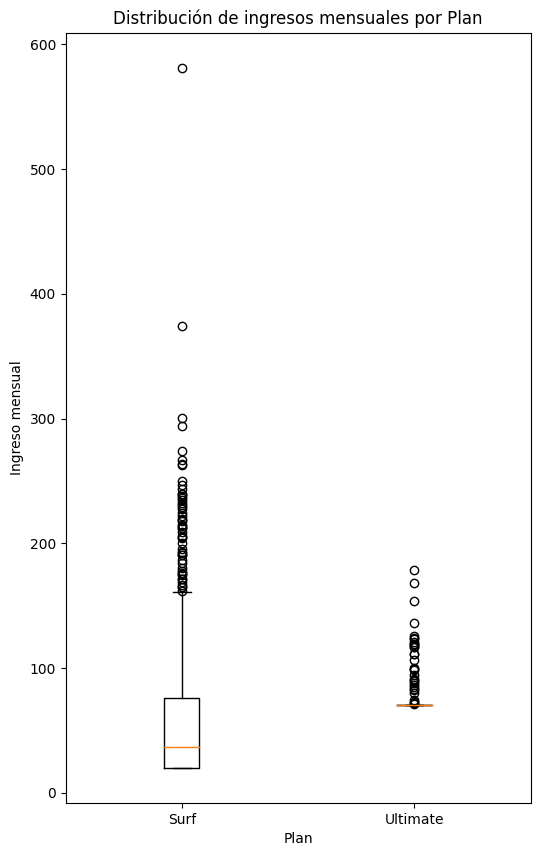

In [43]:
#distribución de ingresos mensuales por plan con diagrama de caja.
plt.figure(figsize=(6,10))
plt.boxplot([surf_revenue, ultimate_revenue],
            labels=['Surf', 'Ultimate'])

plt.title('Distribución de ingresos mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
-En general, 
el plan Ultimate genera mayores ingresos que el plan Surf, lo que concuerda con su costo mayor por incluir más beneficios.
-Sin embargo,el plan surf tiene un mayor número de usuarios por su precio accesible y servicios que cubren las necesidades del suscriptor.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Con las gráficas utilizadas podemos ver las diferencias más marcadas entre los planes, lo que nos ayuda a tomar mejores decisiones y mejorar el negocio
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [44]:

# Prueba las hipótesis

# Separar los datos por plan
surf_revenue = df_merged[df_merged['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = df_merged[df_merged['plan'] == 'ultimate']['monthly_revenue']
#print(surf_revenue)
#print(ultimate_revenue)

# Prueba t para comparar las medias de los 2 planes  (varianzas no iguales).
alpha= 0.05
p_ttest = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False).pvalue
print(f'Valor p: {p_ttest}')


if p_ttest < alpha:
    print("Se rechaza la hipótesis nula: existen diferencias significativas entre los ingresos promedio de los planes Surf y Ultimate.")
else:
    print("No se rechaza: no hay evidencia suficiente para afirmar que los ingresos promedio difieren significativamente entre los planes.")






Valor p: 1.939793941041678e-21
Se rechaza la hipótesis nula: existen diferencias significativas entre los ingresos promedio de los planes Surf y Ultimate.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [45]:

# Prueba las hipótesis
# Filtrar los datos por área e ingreso promedio plan
# NY-NJ
ny_nj_users = df_users_reorganized[df_users_reorganized['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
#print(ny_nj_users)
# Otras areas
other_cities_users = df_users_reorganized[df_users_reorganized['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
#print(other_cities_users)

# Filtrar ingresos por usuario
# NY-NJ
ny_nj_revenue = df_merged[df_merged['user_id'].isin(ny_nj_users['user_id'])]['monthly_revenue']
#print(ny_nj_revenue)
# Otras areas
other_cities_revenue = df_merged[~df_merged['user_id'].isin(ny_nj_users['user_id'])]['monthly_revenue']
#print(other_cities_revenue)


# Prueba t para comparar las medias de los 2 planes  (varianzas no iguales).
alpha= 0.05
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_cities_revenue, equal_var=False)
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

if p_ttest < alpha:
    print("Se rechaza la hipótesis nula: existen diferencias significativas entre los ingresos promedio de los usuarios del área NY-NJ y los de los usuarios de otras regiones.")
else:
    print("No se rechaza: no hay evidencia suficiente para afirmar que los ingresos promedio difieran significativamente entre las regiones.")


Estadístico t: -3.0841
Valor p: 0.0022
Se rechaza la hipótesis nula: existen diferencias significativas entre los ingresos promedio de los usuarios del área NY-NJ y los de los usuarios de otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


Conclusión:
-El comportamiento del uso de los servicios si varía según la zona geográfica. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]



Pregunta general: Cuál de las tarifas genera más ingresos? 
Objetivo general: Ajustar el presupuesto de publicidad.


-El comportamiento de los usuarios esta vínculado al plan que contratan,  y este influye directamente en el nivel de uso de los servicios.

**La mayoria de los usuarios (de ambos planes), usan una cantidad moderada de minutos, solamente un pequeño grupo de usuarios realiza llamadas prolongadas o frecuentes. Este patrón puede reflejar una tendencia general a preferir servicios de mensajería por internet en lugar de llamadas tradicionales.

**En cuanto al cosumo de datos móviles los usuarios del plan ultimate muestran un uso más intenso y variable, aprovechando de forma diversa los servicios de internet. Por otro lado, los usuarios del plan Surf presentan un consumo más moderado y estable de MB.

**El envío de mensajes de texto es relativamente bajo en ambos planes, aunque los usuarios del plan Ultimate tienden a ser más activos también en este aspecto.

Cuál de las tarifas genera más ingresos? 

-El análisis estadístico muestra que existen diferencias significativas entre los ingresos promedio de los planes Surf y Ultimate.

**El plan Ultimate genera mayores ingresos que el plan Surf, lo que concuerda con su  precio más alto y los beneficios adicionales que ofrece, sin embargo, el plan surf cuenta con un mayor número de usuarios por su precio accesible y servicios que cubren las necesidades del suscriptor.

**El analisís por region muestra que el comportamiento del uso de los servicios si varía según la zona geográfica. 
-Se encontraron diferencias estadisticamente significativas entre los ingresos promedio de los usuarios del área NY-NJ y los de los usuarios de otras regiones. Esto sugiere que los patrones de consumo difieren según la ubicación.

Objetivo general: Ajustar el presupuesto de publicidad.
Sugerencias:

-Dirigir las campañas de publicidad de forma segmentada:

**Potenciar el plan Ultimate en regiones y segmentos de mayor consumo; promocionarse a segmentos con mayor disposición de gasto, destacando su valor agregado.

**Fortalecer la presencia del plan Surf en áreas donde predomina un uso más básico o moderado de los servicio, mantenerlo como una opción masiva, clave para la captación y retención de usuarios.


## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- Se revisaron detalles muy minuciosamente con bastante cuidado
- Se mantuvo una consistencia similar en todas las secciones    
    
</div>